<p align = "center" draggable=”false” ><img src="https://user-images.githubusercontent.com/37101144/161836199-fdb0219d-0361-4988-bf26-48b0fad160a3.png" 
     width="200px"
     height="auto"/>
</p>

# 🛍️ Launch New Products

Today you are a machine learning engineer at the Department of New Products at Target Cosmetics! 

We will start with a small dataset on interactions between users and current products from the past and try to discover substructure, if there's any, by applying some **unsupervised learning** methods. 

Then we will leverage the small amount of labeled data (current products) in combination with a larger amount of unlabeled data (new products to launch) to make estimations as to which products will sell more. 

## 📚 Learning Objectives

By the end of this session, you will be able to:

- apply dimensionality reduction techniques to reduce features to a lower dimensional space
- perform customer segmentation, determine optional number of clusters, and understand assumptions for used algorithm
- understand what semi-supervised learning is and leverage it to improve performance of supervised learning

## Task 1. Dimensionality Reduction

1. Load in the data. 
    
    Import `pandas` as `pd` and use `pd.read_csv()` to read in `past.csv.gz` in the `dat` folder, saving it as `past`. 
    
    Data in `past.csv.gz` was propcessed; e.g., features indicating time of day, day of week, month, and year of the purchase have been converted to one-hot representations of these categories. 

In [227]:
# YOUR CODE HERE
import pandas as pd
past = pd.read_csv('../dat/past.csv.gz')
past.tail()

,product_id,user_id,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,...,Dec,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Purchased?,Noon,Category
4995,5610082,5.853313e+08,1.500000,1.000000,77.000000,0.790000,0.790000,0.500000,0.500000,0.000000,...,0.000000,0.500000,0.000000,0.500000,0.000000,0.000000,0.000000,0,0.000000,1.000000
4996,5770265,5.124349e+08,1.954545,1.363636,348649.090909,2.972727,2.972727,0.636364,0.681818,0.590909,...,0.272727,0.136364,0.045455,0.181818,0.409091,0.045455,0.090909,1,0.090909,1.045455
4997,5923106,4.427739e+08,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,1.000000
4998,5889691,6.104029e+08,2.000000,1.000000,766.000000,8.250000,8.250000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,1.000000
4999,5853603,4.144132e+08,1.333333,1.333333,23389.000000,5.426667,5.426667,0.333333,0.666667,0.333333,...,0.000000,0.000000,0.000000,0.333333,0.000000,0.333333,0.000000,0,0.333333,1.000000


<details>
<summary> Expected output </summary>

```
Index(['product_id', 'user_id', 'NumOfEventsInJourney', 'NumSessions',
       'interactionTime', 'maxPrice', 'minPrice', 'NumCart', 'NumView',
       'NumRemove', 'InsessionCart', 'InsessionView', 'InsessionRemove',
       'Weekend', 'Fr', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', '2019',
       '2020', 'Jan', 'Feb', 'Oct', 'Nov', 'Dec', 'Afternoon', 'Dawn',
       'EarlyMorning', 'Evening', 'Morning', 'Night', 'Purchased?', 'Noon',
       'Category'],
      dtype='object')
```
</details>

2. What percentage of the interactions (rows) resulted in a purchase?

    Do people mostly buy what they look at or do they do a lot of "window shopping" (shopping around without buying)?
    
    From the perspective of classification, is the data balanced?

*Answer: Mostly window shopping since about 66% of the data corresponds to non-purchases (see cell below). From the perspective of the classification, the data is not balanced.*


In [228]:
# YOUR CODE HERE
purchased = past.loc[past['Purchased?'] ==1 ]
Total = past.loc[past['Purchased?']]
purchased_percentage = len(purchased)/len(Total) * 100

print(f'{purchased_percentage}% of the interactions resulted in a purchase.')
print(f'{100 - purchased_percentage}% of the interactions did not result in a purchase.')

34.38% of the interactions resulted in a purchase.
65.62% of the interactions did not result in a purchase.


3. Drop `product_id` and `user_id` and save the rest columns to a new `pd.DataFrame`:`X`; then pop the column `'Purchased?'` and save it to `y`.

In [229]:
drop_cols = ['product_id', 'user_id']
X = past.drop(drop_cols, axis=1, inplace = False)
y = X.pop('Purchased?')

In [230]:
assert X.shape == (5000, 34)
assert y.shape == (5000,)

4. Apply [PCA (check documentation if unfamiliar)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to reduce the number of features down to **5**, save it to a numpy array named `X_reduced`. 

    Do you need to preprocess the data before performing PCA? Quick review [here: Importance of feature scaling](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html).
    
    If time permits, read [Does mean centering or feature scaling affect a Principal Component Analysis?](https://sebastianraschka.com/faq/docs/pca-scaling.html) or [discussion 1](https://stats.stackexchange.com/questions/53/pca-on-correlation-or-covariance).

* Yes, it is better to perform a scaling of the matrix. There is an explanation [here]([Link text Here](https://stackoverflow.com/questions/42024705/should-i-perform-data-centering-before-apply-svd)) from the perspective of computing the singular value decomposition of a matrix, which is
the method used by PCA to reduce the dimensionality of the data. Basically, performing SVD on a matrix without scaling the features will lead to some of the features
having a larger impact on the magnitude of the singular values, which translates in the PCA algorithm to a larger impact on the magnitude of the individual features on the variance
or principal components.

In [231]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

pca = PCA(n_components=5, whiten=True)
X_reduced = pca.fit_transform(X_scaled)

In [232]:
assert X_reduced.shape == (5000, 5)

Print out the percentage of variance explained by each of the selected components.

In [233]:
# YOUR CODE HERE
print(pca.explained_variance_ratio_)
sum(pca.explained_variance_ratio_*100)

[0.10282317 0.0944492  0.06510332 0.0513623  0.04239548]


35.613346151581254

6. Review code in functions `visualize_2pcs` and `visualize_3pcs` below and visualize first few principal components in 2D and 3D plots, respectively:

In [234]:
import matplotlib.pyplot as plt

def visualize_2pcs(pcs, y):
    fig, ax = plt.subplots()
    plot = plt.scatter(pcs[:,0], pcs[:,1], c=y) 
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])

In [235]:
def visualize_3pcs(pcs, y):
    fig, ax = plt.subplots()
    ax = fig.add_subplot(projection='3d')
    plot = ax.scatter(pcs[:,0], pcs[:,1], pcs[:,2], c=y)
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])

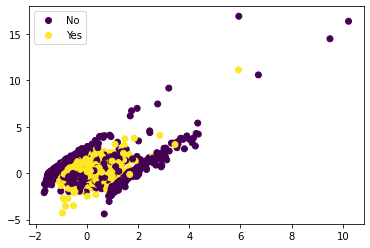

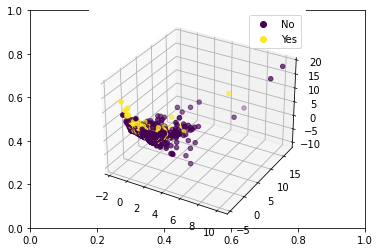

In [236]:
visualize_2pcs(X_reduced,y)
visualize_3pcs(X_reduced,y)
# YOUR CODE HERE

7. One way to assess the quality of the dimensionality reduction, when the ground truth is available of course, is comparing the prediction performance using given features vs reduced (engineered) features.

    Complete the wrapper function below that
    - takes features, target, and a boolean parameter indicating whether to include standardization in the pipeline or not
    - split the data into train (80%) and test (20%) datasets, set the random state for spliting at 0
    - build a pipeline that 

        1) preprocessing data using standardization if the `standardize` is `True`; otherwise skip this step
        2) apply logistic regression (are the labels balanced? ¡)
        
    - fit the pipeline using training data
    - print the classification report (use `sklearn.metrics.classification_report`) on test data

In [237]:
# YOUR CODE HERE (imports!)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

def train(X, y, standardize = True) -> None:
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Build the pipeline
    if standardize is True:
        scaler = StandardScaler().fit(X_train)
        X_train = scaler.transform(X_train)
        X_test  = scaler.transform(X_test)

    clf = LogisticRegression(random_state=0, class_weight='balanced').fit(X_train, y_train)
    results = clf.predict(X_test)
    target_names = ['No', 'Yes']
    print(classification_report(y_test, results, target_names=target_names))


Now apply the pipeline on the all the features `X` and review the performance

In [238]:
train(X, y, True)  #YOUR CODE HERE

              precision    recall  f1-score   support

          No       0.75      0.77      0.76       649
         Yes       0.55      0.52      0.54       351

    accuracy                           0.68      1000
   macro avg       0.65      0.65      0.65      1000
weighted avg       0.68      0.68      0.68      1000



Similarly, apply the pipeline on the reduced / engineered features `X_reduced`. Should you include standardization in the pipeline?

*I think standardization should not be included in this case because a scaling was already performed for the computation of the PCA. I am not sure though*


In [239]:
train(X_reduced, y, False)
# YOUR CODE HERE

              precision    recall  f1-score   support

          No       0.74      0.71      0.73       649
         Yes       0.50      0.53      0.51       351

    accuracy                           0.65      1000
   macro avg       0.62      0.62      0.62      1000
weighted avg       0.65      0.65      0.65      1000



8. Are the results as expected? Discuss the pros and cons using reduced set of features in this application with your
teammate.

*The results are not completely as I expected them, because the explained variance of the PCA model is not so high (total of 35%), but the reduced model metrics are very close to the ones of the ones of the unreduced model. But in this case the visualization shows that in 2D and 3D the classes don't seem to be separated well, which partially explains that the classification with a logistic regression model might not perform well. This might change when going to higher dimensions though, but we cannot visualize this.*

- *One advantage is that logistic regression on the reduced model should be less expensive, so for a larger dataset where computing a logistic regression on the full dataset this could reduce the computational cost.*
- *One disadvantage is that the PCA with only 5 components is not very accurate (the total explained variance ratio is about 35%) so it might to be a good idea to use more components and then train the logistic regression on the reduced set of (more) features.*
- *One big disadvantage is that the set of (orthogonal) features computed with the PCA is not explainable.*

## Task 2. Customer Segmentation

In this task, we apply k-means clustering on the reduced data, experimenting different values of `n_cluster`, summarize all this information in a single plot, the *Elbow* plot. In addition, leverage silhouette visualization to help decide the "optimal" number of clusters in our data and answer:

1. Are there any patterns among customer purchasing behaviors?
2. If so, what categories do they belong to? How do you characterize the clusters?
3. If not, what followup steps and / or recommendations will you make as an MLE?

4. Look up the [documentation](https://scikit-learn.org/stable/modules/clustering.html) and import the model class for k-means from `sklearn.cluster`

In [240]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

5. Complete `visualize_elbow`; inspect the code and complete

    - fit k-means on the given data `X` and `k`, setting `random_state` to be 10 for reproducibility
    - append the sum of squared distances of samples to their closest cluster center for each $k$ to list `inertias`

In [241]:
def visualize_elbow(X, ks):
    fig, ax = plt.subplots()
    inertias = [0]*len(ks)
    for index, k in enumerate(ks):
        kmeans = KMeans(n_clusters=k, random_state=10).fit(X)
        inertias[index] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    plt.plot(ks, inertias/np.max(np.asarray(inertias)))
    plt.xticks(ks)
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow plot')

6. Visualize the elbow plot for the number of clusters ranging between 2 and 9. Discuss with your teammate, what is the 'optimal' number of clusters?

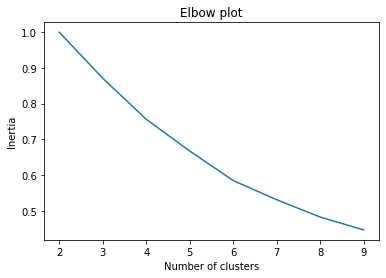

In [242]:
ks = range(2,10)
visualize_elbow(X_reduced, ks)

7. What are the disadvantage to use the Elbow method?

*Answer: It can be hard to visualize the elbow point, especially when the clusters are not well separated*

5. Let's try a different approach: [silhouette score](https://towardsdatascience.com/clustering-metrics-better-than-the-elbow-method-6926e1f723a6).

    A helper function `visualize_silhouette` is provided for you (inspect the code in `utils.py`) and figure out how to use it to visualize k-means for k ranges from 2 to 8 on the reduced data. 

In [243]:
from utils import visualize_silhouette  # YOUR CODE HERE

For n_clusters = 2 The average silhouette_score is : 0.19829110718171805
For n_clusters = 3 The average silhouette_score is : 0.20920047291719238
For n_clusters = 4 The average silhouette_score is : 0.21960849129429885
For n_clusters = 5 The average silhouette_score is : 0.20428129136777148
For n_clusters = 6 The average silhouette_score is : 0.20952088295828758
For n_clusters = 7 The average silhouette_score is : 0.2124919988844651
For n_clusters = 8 The average silhouette_score is : 0.21692469676355314


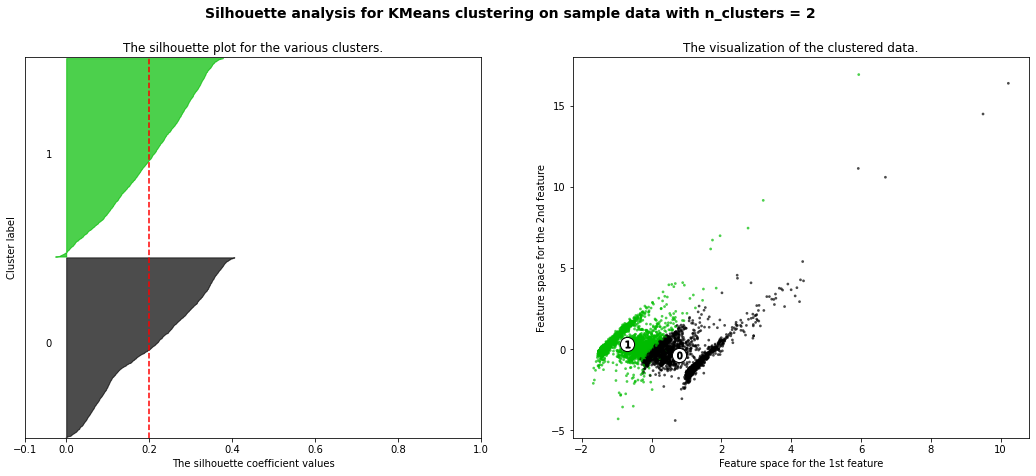

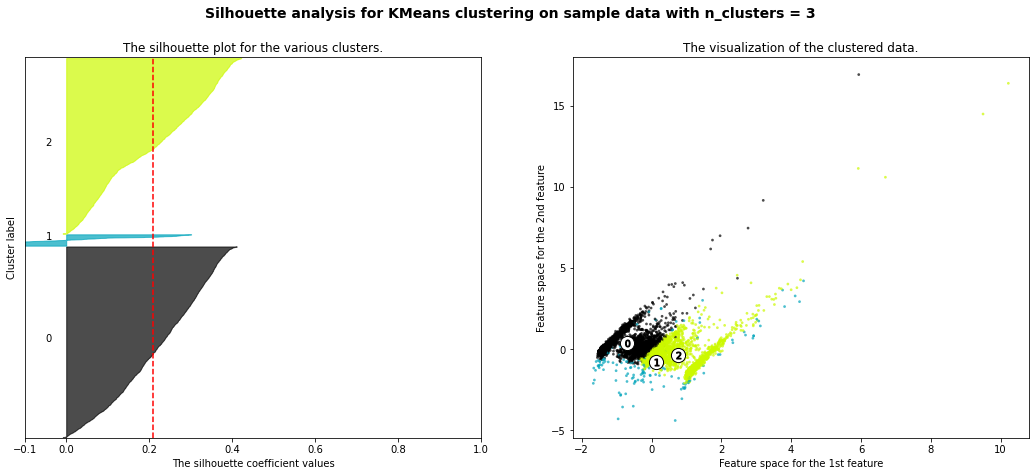

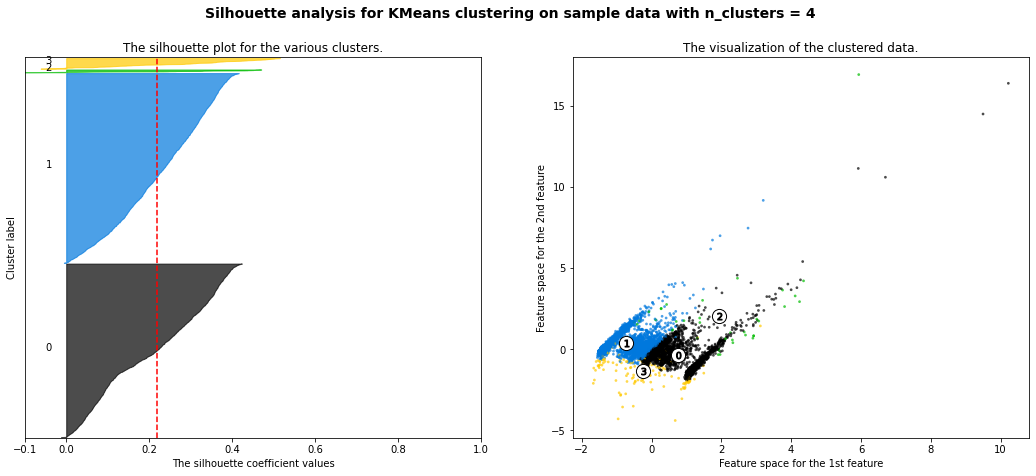

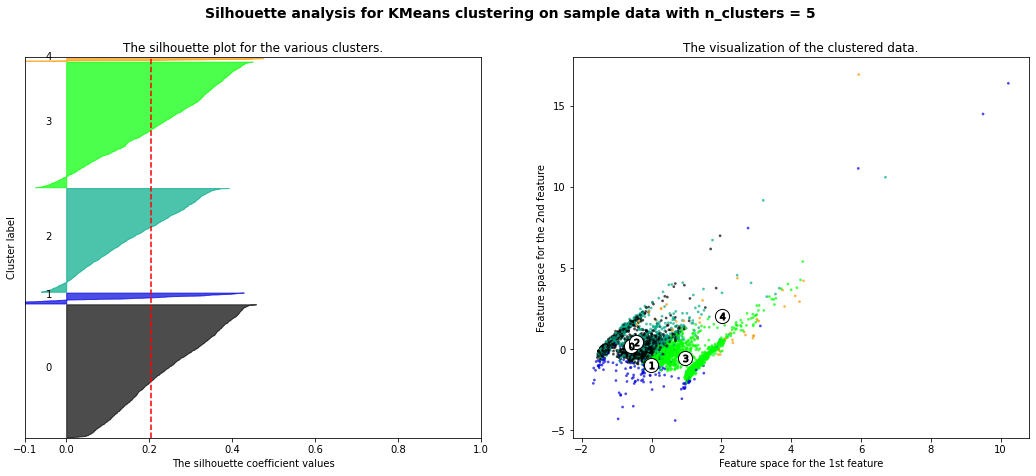

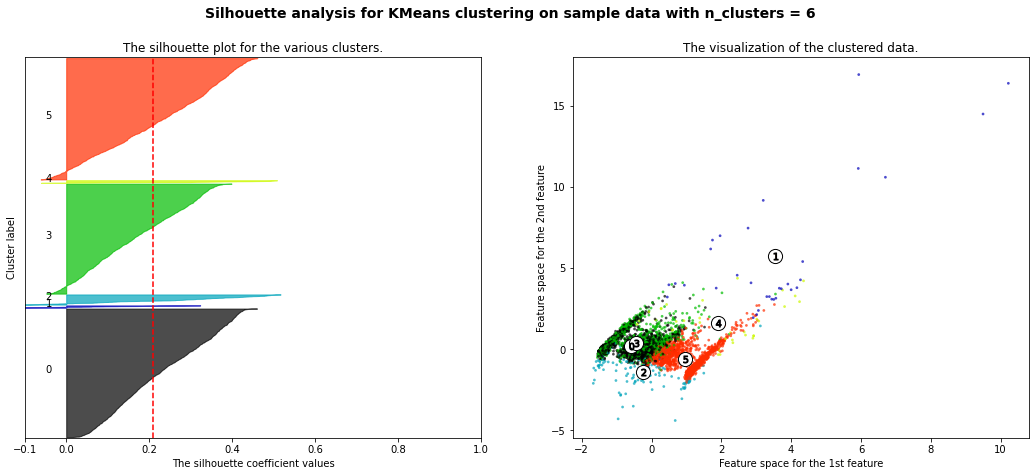

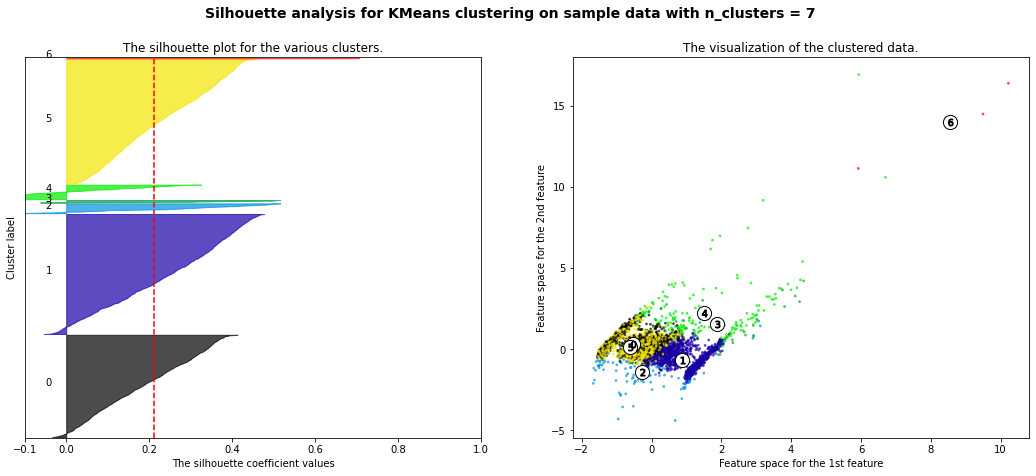

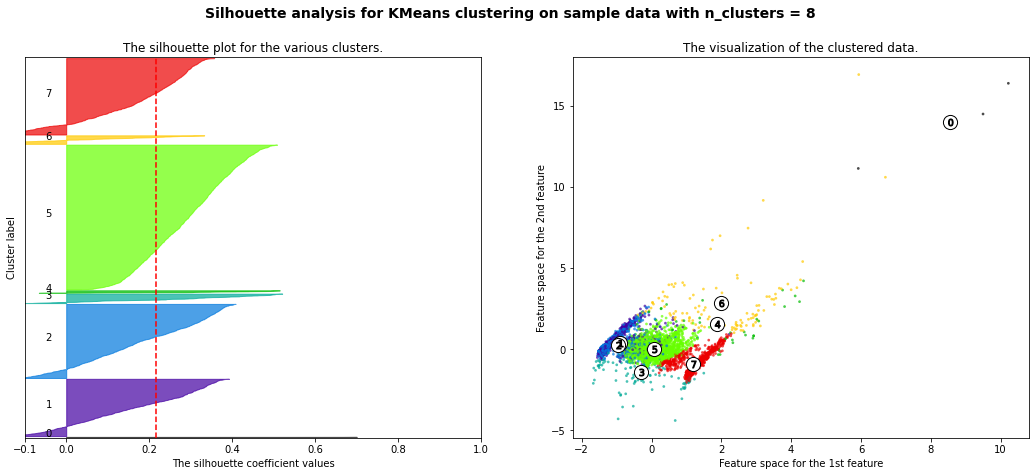

In [244]:
visualize_silhouette(8, np.asarray(X_reduced))# YOUR CODE HERE

6. Instantiate a k-means model using the number of cluster that you deem optimal, assign it to `km`, and fit on the reduced data.


*Answer: I think the optimal number of clusters is 2, but I am not sure if this is the best answer. It also seems reasonable that the number of clusters is 4, according to the average silhouette score. The choice of 2 is adequate since the thickness of the silhouette plots is uniform for the two clusters and there are no silhouette scores below the average silhouette score. Also, with $n = 3,..., 8$ there are some samples with a negative silhouette score which suggests that they have been assigned to the wrong cluster ([reference](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)). One thing to note is that the average silhouette scores are low, because the silhouette score normally lies in $(-1,1)$ but none of the average scores is higher than 0.23 and they only differ by a small amount of less than 0.01, so it could be that the K-means method is not a good choice for this data. Also, as mentioned earlier, the PCA-reduced dataset can only explain about 35% of the variance of the original non-reduced dataset, so it is hard to say if this analysis can lead to a certain conclusion.*

In [245]:
km = KMeans(n_clusters=2, random_state=10).fit(X_reduced)
labels_k2 = km.predict(X_reduced)

In [246]:
# YOUR CODE HERE
count0_k2 = (labels_k2 == 0).sum()
count1_k2 = (labels_k2 == 1).sum()

print(f'The size of the first cluster is {count0_k2}.')
print(f'The size of the second cluster is {count1_k2}.')

The size of the first cluster is 2376.
The size of the second cluster is 2624.


In [247]:
km = KMeans(n_clusters=4, max_iter=300, random_state=10).fit(X_reduced)
labels_k4 = km.fit_predict(X_reduced)

8. What is the size of each cluster?

In [248]:
# YOUR CODE HERE
count0_k4 = (labels_k4 == 0).sum()
count1_k4 = (labels_k4 == 1).sum()
count2_k4 = (labels_k4 == 2).sum()
count3_k4 = (labels_k4 == 3).sum()
print(f'The size of the first cluster is {count0_k4}.')
print(f'The size of the second cluster is {count1_k4}.')
print(f'The size of the third cluster is {count2_k4}.')
print(f'The size of the fourth cluster is {count3_k4}.')

The size of the first cluster is 2303.
The size of the second cluster is 2518.
The size of the third cluster is 38.
The size of the fourth cluster is 141.


9. Create a new column called `cluster_pca` in `past`, with values as predicted cluster index predicted by `km`.

In [249]:
past['cluster_pca'] = labels_k2

10. Open-ended: manipulate `past` and see if you can characterize each cluster (e.g., calculate statistics of / visualize features for each cluster), how will you intepret the results?
     **Note**. This is probably the most important part as far as the business stakeholders are concerned: "*What can I do with your results?*" The math, modeling part is relatively easy, compared to actionable recommendations you make for business. Thus, before jumping on a different algorithm for the given task, do you best to 1) understand the data in depth 2) keep buisiness use cases in mind throughout all steps.

NumOfEventsInJourney
count    2376.000000
mean        1.962819
std         1.353143
min         1.000000
25%         1.000000
50%         1.750000
75%         2.327083
max        28.000000
Name: NumOfEventsInJourney, dtype: float64
NumSessions
count    2376.000000
mean        1.347695
std         0.902410
min         1.000000
25%         1.000000
50%         1.181335
75%         1.500000
max        28.000000
Name: NumSessions, dtype: float64
interactionTime
count    2.376000e+03
mean     3.069422e+05
std      8.735577e+05
min      0.000000e+00
25%      0.000000e+00
50%      3.491950e+03
75%      2.295853e+05
max      1.087537e+07
Name: interactionTime, dtype: float64
NumOfEventsInJourney
count    2624.000000
mean        1.940451
std         1.298628
min         1.000000
25%         1.000000
50%         1.800000
75%         2.285714
max        40.000000
Name: NumOfEventsInJourney, dtype: float64
NumSessions
count    2624.000000
mean        1.308360
std         0.495123
min         1.000

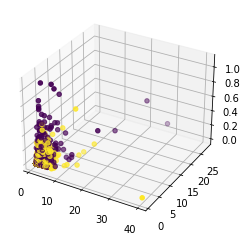

In [250]:
r = range(0,2)
metrics = {'NumOfEventsInJourney': [], 'NumSessions': [], 'interactionTime':[]}
for x in r:
   w = past[past['cluster_pca'] == x].describe()
   interestingCols = ['NumOfEventsInJourney', 'NumSessions', 'interactionTime']
   for index, col in enumerate(interestingCols):
       print(interestingCols[index], w[col], sep = '\n')

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(past['NumOfEventsInJourney'], past['NumSessions'], past['interactionTime'], c=past['cluster_pca'])


11. What are the assumptions for k-means? Judging by the cluster sizes, is k-means a good approach?

*Answer: According to [this reference](https://stats.stackexchange.com/questions/133656/how-to-understand-the-drawbacks-of-k-means):*
- *k-means assumes the variance of the distribution of each attribute (variable) is spherical*
- *all variables have the same variance*
- *the prior probability for all k clusters is the same, i.e., each cluster has roughly equal number of observations*
- *The resulting clusters will be convex shaped*

*Judging by the cluster sizes when k=2  it does seem like a good approach, but by all other metrics it does not seem like a good approach.
When k=4 it does not seems like a good approach juding from the size of the cluster*



Scanning the list of [clustering algorithms](https://scikit-learn.org/stable/modules/clustering.html) implemented in scikit-learn, try at least one other algorithm, examine its assumptions, and interpret results.

I tried the OPTICS method which tries to find density-based clusters, i.e., clusters are defined as dense regions of data points separated by low-density regions,
so not only distances but also density/number of neighbors are used to construct the clusters. This makes it more robust to noise and outliers. It also does not require the number of clusters to be provided in advance.


In [251]:

from sklearn.cluster import OPTICS

optics_model = OPTICS(min_samples = 10, xi = 0.05, min_cluster_size = 0.05, metric = 'manhattan')
optics_model.fit(X_reduced)

OPTICS(metric='manhattan', min_cluster_size=0.05, min_samples=10)

In [252]:
print(np.unique(optics_model.labels_))


[-1  0]


17. Jot down recommendations or followup steps, detailing the reasons.

    *YOUR ANSWER HERE*

## Task 3. To launch or not to launch?

In this task, we will work on a hypothetical application: cosmetics purchase prediction for new products with limited features. The intention here is to maximize **recall** so that no popular cosmetic is understocked. Overstocking is less of a concern since it will not cause disengagement in customers.

The purchase status for each "new" product is known, but we only use the labels for benchmarking purpose. Instead, we use label spreading method to leverage a small amount of labeled data in combination with a larger amount of unlabeled data.

1. Read in the data in `new.csv.gz` and save it as a `pd.DataFrame` named `new`. This is the test dataset.

    Look at the shape of `new` and inspect the frist few rows.

In [253]:
# YOUR CODE HERE

new = pd.read_csv('../dat/new.csv.gz')
new.shape


(30091, 5)

In [254]:
assert new.shape == (30091, 5)

In [255]:
new.head()

,product_id,maxPrice,minPrice,Purchased?,Category
0,5866502,7.616667,7.616667,0,1.0
1,5870408,6.270000,6.270000,0,3.0
2,5900580,10.008000,10.008000,0,1.0
3,5918778,5.980000,5.980000,0,2.5
4,5848772,26.830000,26.830000,0,1.0


2. How does the number of data points in the training set (`past`) compare to the number of datapoints in the test set (`new`)? 

    And how does the feature set in the training set compare to the feature set in the test set?

In [256]:
new.shape

(30091, 5)

*The number of datapoints in the training set is relatively small while the test set is quite large. The training set (before PCA) has more features than in the test set (34 vs 4).*

3. Are there any product ids in both the training and test datasets? Hint: use `np.intersect1d` or set operations.
No, there aren't any products in both the training and test datasets.

In [257]:
# YOUR CODE HERE
np.intersect1d(past.product_id, new.product_id)


array([], dtype=int64)

5. What percentage of data points resulted in a purchase in the test set?

    In reality, we won't be able to calculate information that is not available to you. Here, we simply demonstrated that the distributions in target between `past` and `new` are similar. 

In [258]:
# YOUR CODE HERE #
purchased_percentage = new['Purchased?'].sum()/new.shape[0]*100

print(f'The percentage of data points resulting in a purchase in the test set is {purchased_percentage}%')
# ~.344

The percentage of data points resulting in a purchase in the test set is 34.42557575354757%


6. Create `ndarray`s: `X_train`, `y_train`, `X_test`, and `y_test` according to the following guidelines.

    - The `Purchased?` column is the target.
    - `X_train` and `X_test` should contain the same features
    - `product_id` should not be a feature.

    Double check that the shapes of the four arrays are what you expect.

In [259]:
# YOUR CODE HERE
cols = new.columns
target_col = 'Purchased?'
X_train = past.copy()[cols].drop(['product_id'], axis = 1)
y_train = X_train.pop(target_col)
X_test = new.copy()[cols].drop(['product_id'], axis = 1)
y_test = X_test.pop(target_col)


X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5000, 3)
(30091, 3)
(5000,)
(30091,)


In [260]:
assert X_train.shape[0] == y_train.shape[0] # 5000
assert X_train.shape[1] == X_test.shape[1]  # 3

assert type(X_train) == np.ndarray # make sure you import numpy as np at this point
assert type(X_train).__module__ == type(y_train).__module__ == np.__name__  # alternative way

7. Let's fit a simple logistic regression on the training set (`X_train`, `y_train`) and report performance on the test set (`X_test`, `y_test`).

In [261]:
clf = LogisticRegression(class_weight = 'balanced', random_state=42, max_iter = 1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.78      0.94      0.85     19732
           1       0.81      0.49      0.61     10359

    accuracy                           0.79     30091
   macro avg       0.80      0.72      0.73     30091
weighted avg       0.79      0.79      0.77     30091



8. Re-assemble data for semi-supervised learning.
    - Use the features from the test set along with the features from the training set. 
    - Only use the labels from the training set but none from the test set.  
    
    Since we're using a large number of sampled features, but only a small number of these samples have labels, this is **semi-supervised learning**.

Create a matrix `X` that has the rows from `X_train` concatenated with the rows from `X_test`. Check the shape of the matrix.

In [262]:
# YOUR CODE HERE
X = np.concatenate((X_train, X_test), axis = 0)

In [263]:
assert X.shape == (35091, 3)

Create the target array `y` by concatenating `y_train` with a vector of -1's, effectively creating a dummy label for the `X_test` rows in `X`. Check the shape of the array. It should have as many values as `X` has rows.

In [264]:
vec = -1*np.ones(X_test.shape[0])
y = np.concatenate((y_train, vec), axis = 0)

In [265]:
assert X.shape[0] == y.shape[0]

8. Semi-supervised learning. 

    Scikit-learn provides two label propagation models: [`LabelPropagation`](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelPropagation.html) and [`LabelSpreading`](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelSpreading.html). Both work by constructing a similarity graph over all items in the input dataset. `LabelSpreading` is similar to the basic Label Propagation algorithm, but it uses an affinity matrix based on the normalized graph Laplacian and soft clamping across the labels; thus more robust to noise. We will be using scikit-learn's `LabelSpreading` model with `kNN`.
    
    Train a `LabelSpreading` model. Set `kernel` to `knn` and `alpha` to 0.01.

In [266]:
from sklearn.semi_supervised import LabelSpreading

label_p = LabelSpreading(kernel='knn', alpha=0.01)
label_p.fit(X, y)

LabelSpreading(alpha=0.01, kernel='knn')

9. Extract the predictions for the test data. 

    You can get the predictions from the `transduction_` attribute. Note that there is a value for every row in `X`, so select just the values that correspond to `X_test`.

In [267]:
semi_sup_preds = label_p.transduction_[X_train.shape[0]:] # We only select the values that correspond to X_test

In [268]:
assert semi_sup_preds.shape[0] == X_test.shape[0]

10. Print the classification report

In [269]:
print(classification_report(y_test, semi_sup_preds)) # make sure you properly import classification_report

              precision    recall  f1-score   support

           0       0.83      0.92      0.87     19732
           1       0.80      0.63      0.71     10359

    accuracy                           0.82     30091
   macro avg       0.81      0.77      0.79     30091
weighted avg       0.82      0.82      0.81     30091



Let's bring the performance from the supervised learning model down to see the comparison; discuss the areas of improvement and reasons for improvement.

In [270]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85     19732
           1       0.81      0.49      0.61     10359

    accuracy                           0.79     30091
   macro avg       0.80      0.72      0.73     30091
weighted avg       0.79      0.79      0.77     30091



The semi-supervised learning model was able to predict the labels for the test set much better than the logistic regression. In this case a small dataset of labeled data was used to label a larger dataset with a label spreading technique. In the logistic regression we were only using a small dataset to train the model compared to the semi-supervised learning model, which explains the improved performance.

11. Read [Small Data Can Play a Big Role in AI](https://hbr.org/2020/02/small-data-can-play-a-big-role-in-ai) and discuss with your teammate about AI tools for training AI with small data and their use cases. 

## Acknowledgement & References

- data was adapted from Kaggle: [eCommerce Events History in Cosmetics Shop](https://www.kaggle.com/mkechinov/ecommerce-events-history-in-cosmetics-shop)
- function `visualize_silhouette` was adapted from [plot_kmeans_silhouette_analysis by scikit-learn](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)
- [Categorizing Online Shopping Behavior from Cosmetics to Electronics: An Analytical Framework](https://arxiv.org/pdf/2010.02503.pdf)
- [OPAM: Online Purchasing-behavior Analysis using Machine learning](https://arxiv.org/pdf/2102.01625.pdf)